<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Predictive Modelling Project Coded</center></font>


## Problem Statement

### Business Context

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at $121.61 billion in 2019 and is projected to reach $1,039.03 billion by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

### Objective

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

###Data Description
The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

**Data Dictionary:**



*   visitors: Average number of visitors, in millions, to the platform in the past week.

*   ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed).

*   major_sports_event: Indicator of any major sports event on the day (0 or 1).
*  genre: Genre of the content.

*  dayofweek: Day of the release of the content.

*  season: Season of the release of the content.

*  views_trailer: Number of views, in millions, of the content trailer.

*   views_content: Number of first-day views, in millions, of the content




## Installing  and Importing Necessary Libraries


In [254]:
# Installing the libraries with the specified version.
!pip install pandas==2.0.3 numpy==1.25.2 seaborn==0.13.1 matplotlib==3.7.1 scikit-learn==1.2.2 statsmodels==0.14.2 -q --user

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [256]:
# uncomment and run the following lines for mounting Google Drive to the notebook (to be used only if executing in Google Colab)
# from google.colab import drive
# drive.mount('/content/drive')

In [257]:
data = pd.read_csv("/content/sample_data/ottdata.csv")

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

**The below functions need to be defined to carry out the EDA.**

In [258]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color="blue"
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [259]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="twilight",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

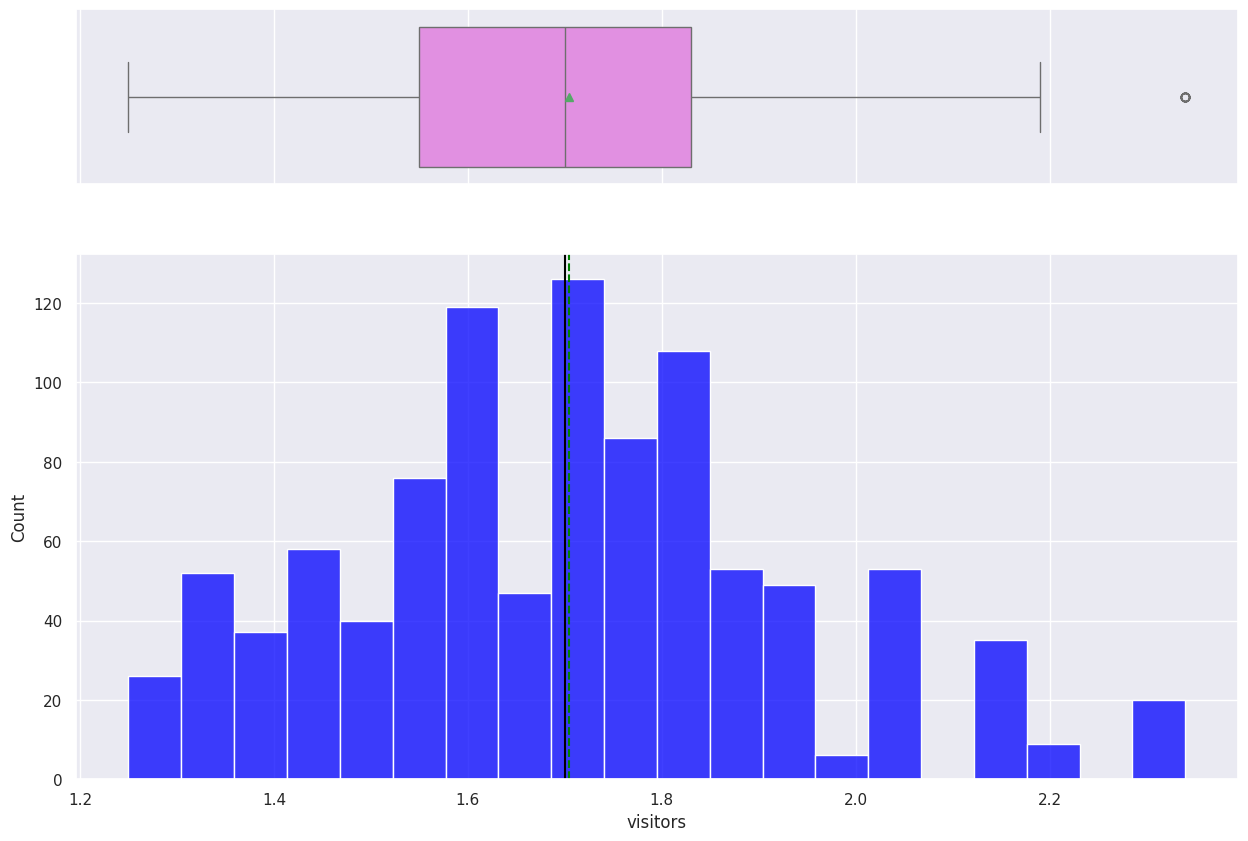

In [260]:
histogram_boxplot(data, "visitors")

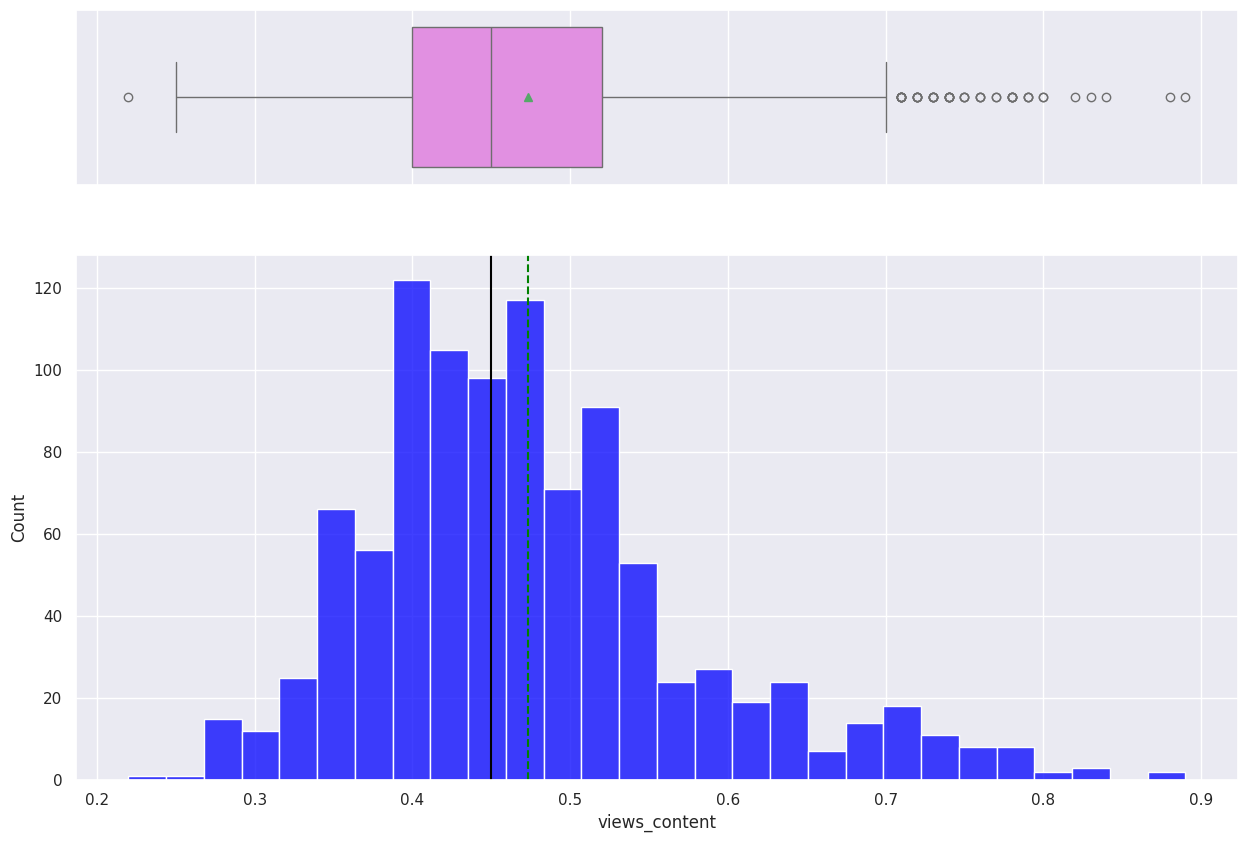

In [261]:
histogram_boxplot(data, "views_content")

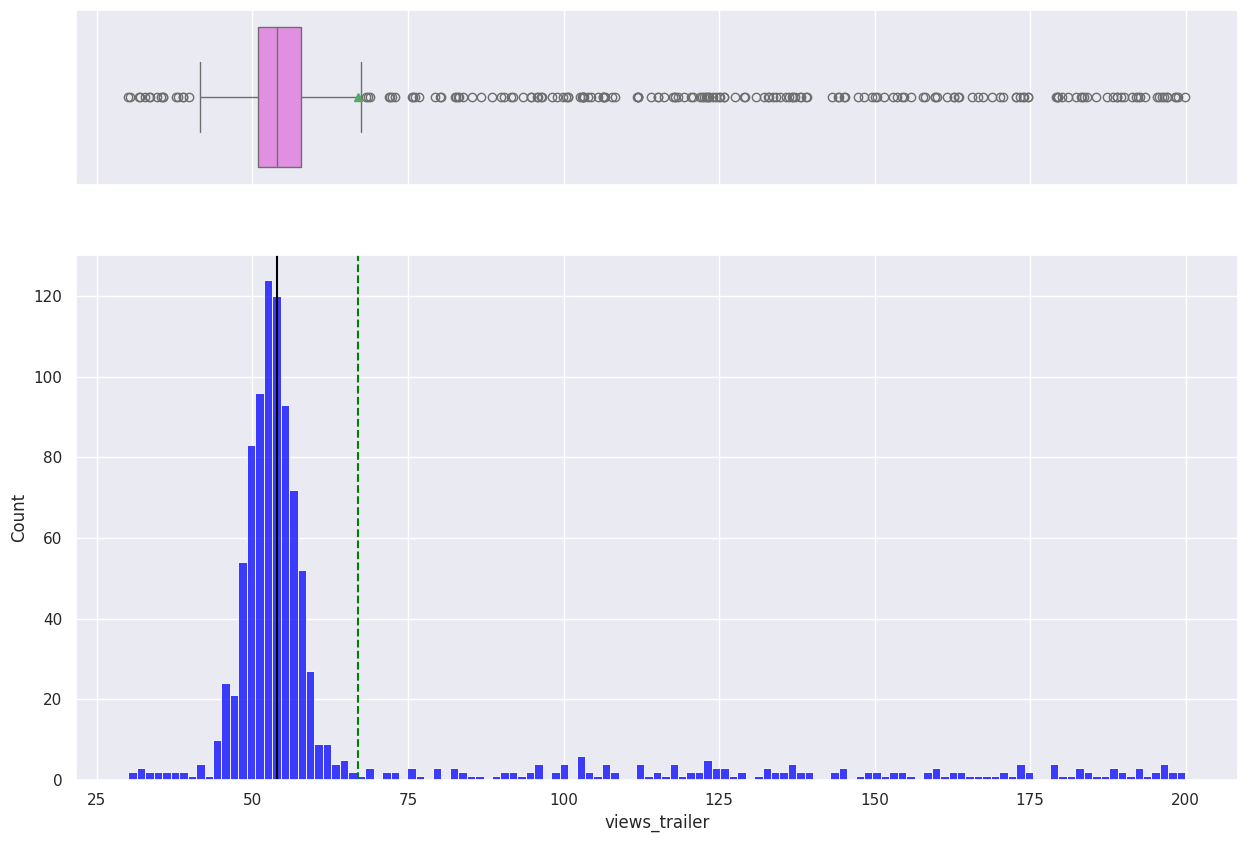

In [262]:
histogram_boxplot(data, "views_trailer")

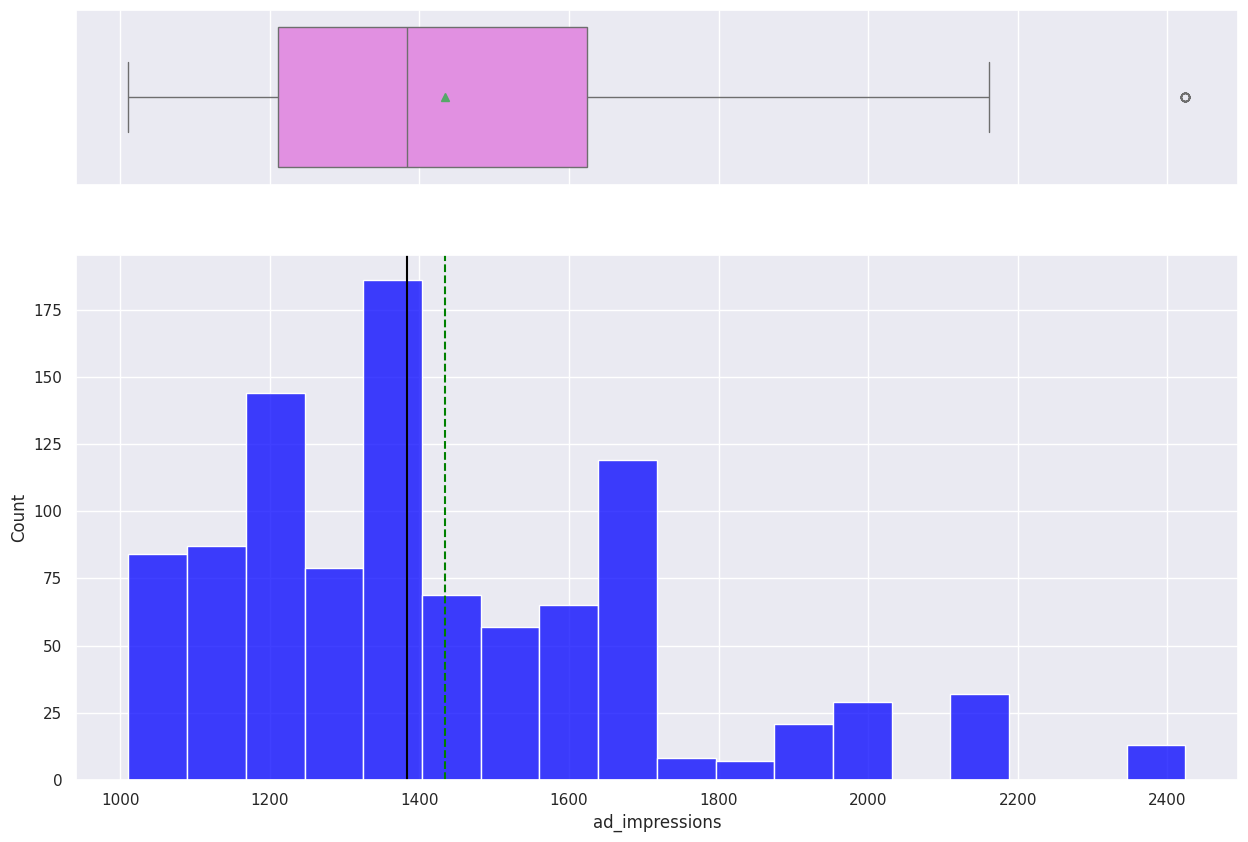

In [263]:
histogram_boxplot(data, "ad_impressions")

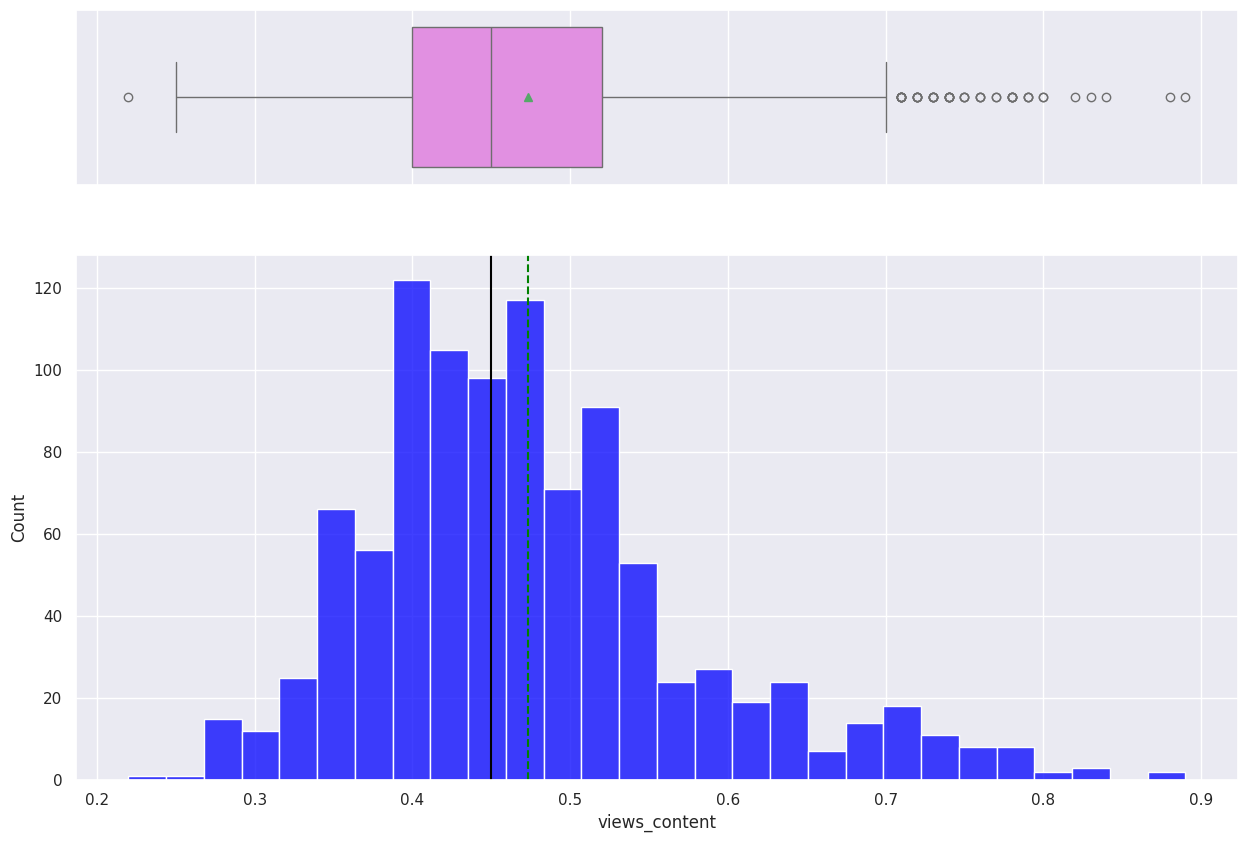

In [264]:
histogram_boxplot(data, "views_content")

<Axes: xlabel='genre'>

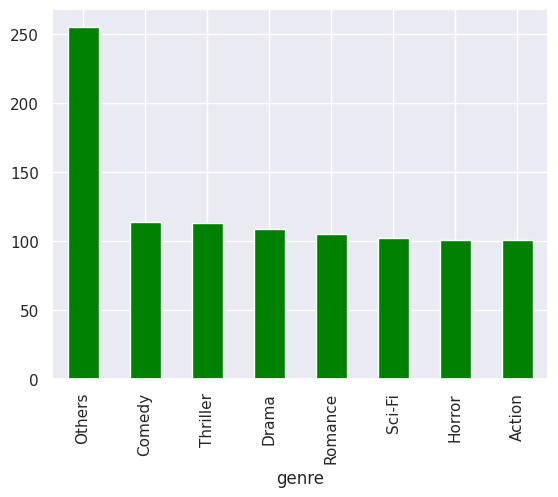

In [265]:
genre = data.genre
(genre.value_counts().plot.bar(color='Green'))

<ipython-input-259-c45c5e15558b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


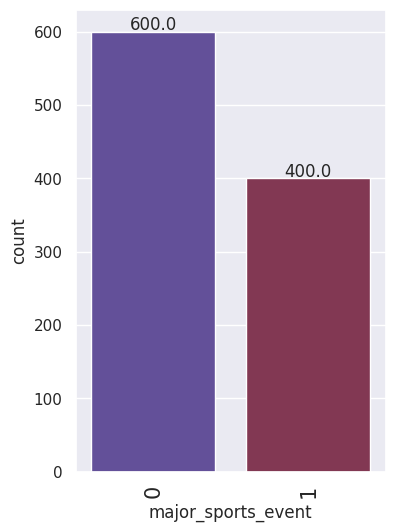

In [266]:
labeled_barplot(data, "major_sports_event")

<ipython-input-259-c45c5e15558b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


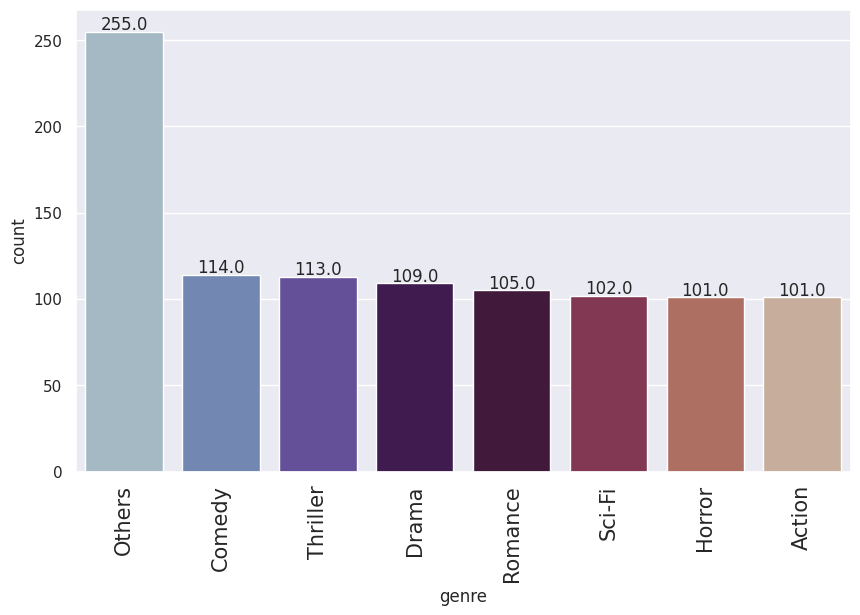

In [267]:
labeled_barplot(data, "genre")

<ipython-input-259-c45c5e15558b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


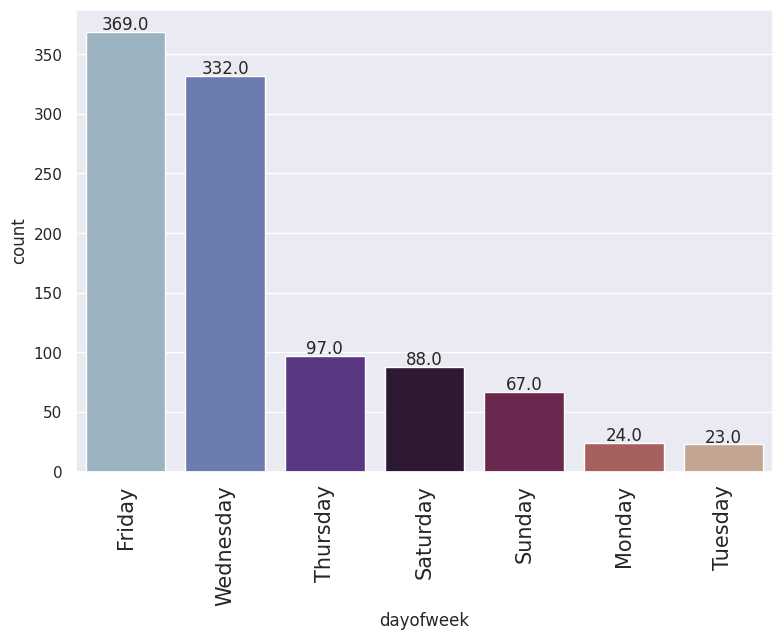

In [268]:
labeled_barplot(data, "dayofweek")

<ipython-input-259-c45c5e15558b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


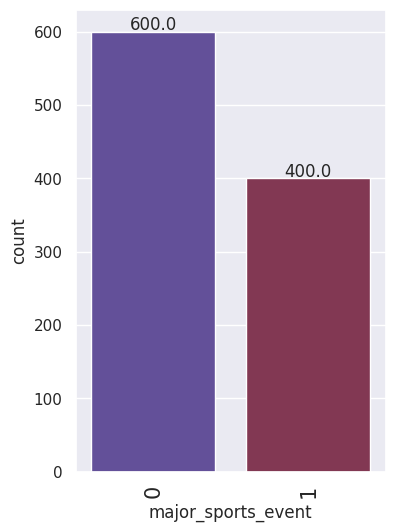

In [269]:
labeled_barplot(data, "major_sports_event")

In [270]:
(data.pivot_table(index='dayofweek', aggfunc={'visitors':'mean','ad_impressions':'mean','views_trailer':'mean'})).style.highlight_max(color="yellow", axis=0)

,ad_impressions,views_trailer,visitors
dayofweek,,,
Friday,1443.884065,65.999566,1.704770
Monday,1410.471667,62.680000,1.751667
Saturday,1435.818750,62.818864,1.715227
Sunday,1443.720896,69.039254,1.706716
Thursday,1425.113196,67.447216,1.688041
Tuesday,1396.764348,71.657826,1.749130
Wednesday,1429.592892,68.413343,1.698584


In [271]:
(data.pivot_table(index='genre', aggfunc={'visitors':['min','max'],'views_content':'mean','ad_impressions':'mean','views_trailer':'mean'})).style.highlight_max(color="yellow", axis=0)

In [272]:
(data.pivot_table(index='season', aggfunc={'visitors':['min','max'],'views_content':'mean','ad_impressions':'mean','views_trailer':'mean'})).style.highlight_max(color="yellow", axis=0)

In [273]:
(data.pivot_table(index='dayofweek',aggfunc={'visitors':['min','max'],'views_content':'mean','ad_impressions':'mean'})).style.highlight_max(color="yellow", axis=0)

In [274]:
pd.crosstab(data.genre, data.season, margins=True).style.background_gradient(cmap="PuOr")

season,Fall,Spring,Summer,Winter,All
genre,,,,,
Action,15,18,44,24,101
Comedy,21,27,41,25,114
Drama,21,28,25,35,109
Horror,37,21,21,22,101
Others,71,71,51,62,255
Romance,31,26,22,26,105
Sci-Fi,22,25,19,36,102
Thriller,34,31,21,27,113
All,252,247,244,257,1000


In [275]:
pd.crosstab(data.genre, data.dayofweek, margins=True).style.background_gradient(cmap="PuOr")

dayofweek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
genre,,,,,,,,
Action,33,4,8,8,12,1,35,101
Comedy,37,2,12,5,11,2,45,114
Drama,39,4,8,3,9,3,43,109
Horror,36,2,9,5,10,5,34,101
Others,93,8,21,19,28,8,78,255
Romance,48,1,9,5,10,2,30,105
Sci-Fi,40,1,15,8,5,1,32,102
Thriller,43,2,6,14,12,1,35,113
All,369,24,88,67,97,23,332,1000


In [276]:
pd.crosstab(data.genre, data.major_sports_event, margins=True).style.background_gradient(cmap="PuOr")

major_sports_event,0,1,All
genre,,,
Action,62,39,101
Comedy,71,43,114
Drama,51,58,109
Horror,74,27,101
Others,156,99,255
Romance,61,44,105
Sci-Fi,66,36,102
Thriller,59,54,113
All,600,400,1000


<ipython-input-277-452bc994a764>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="genre", y="views_content", palette="Set2")


<Axes: xlabel='genre', ylabel='views_content'>

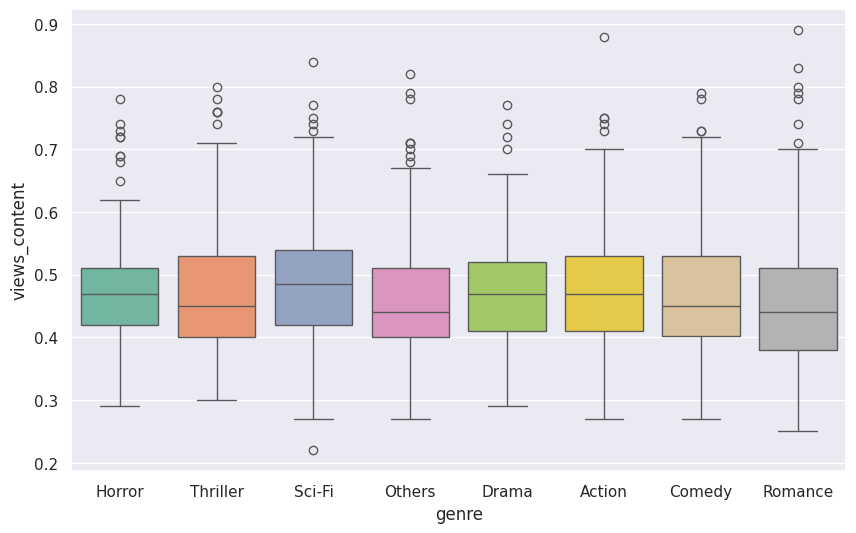

In [277]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x="genre", y="views_content", palette="Set2")

<Axes: xlabel='genre', ylabel='views_content'>

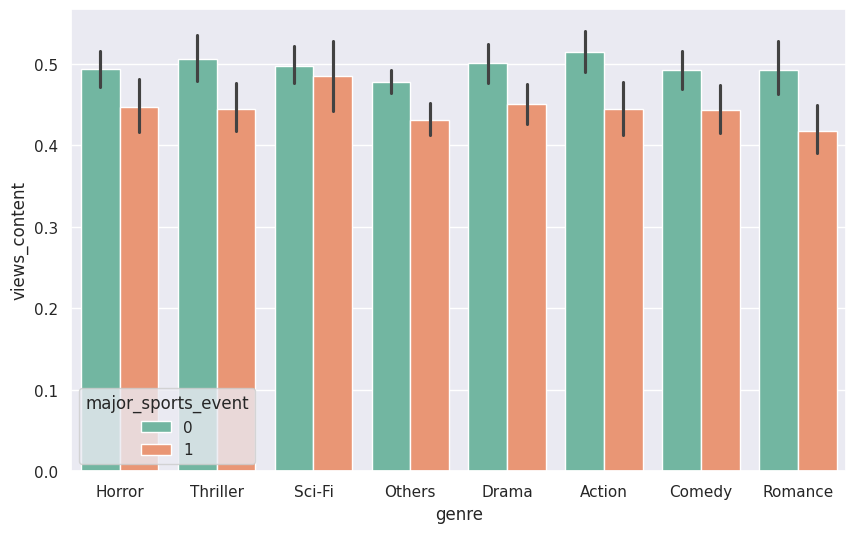

In [278]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x="genre", y="views_content", hue="major_sports_event", palette="Set2")

<ipython-input-279-6ae0abfc2d18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="dayofweek", y="views_content", palette="Set1")


<Axes: xlabel='dayofweek', ylabel='views_content'>

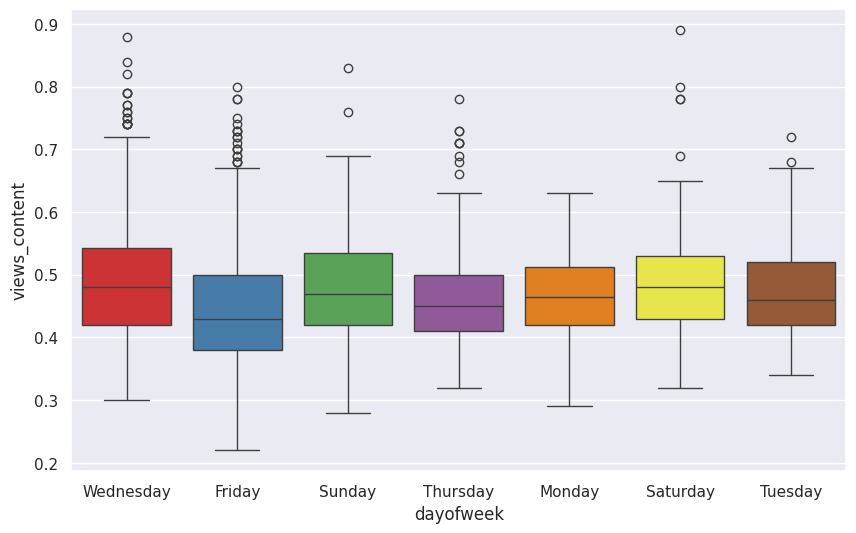

In [279]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x="dayofweek", y="views_content", palette="Set1")

<ipython-input-280-e16f054ca510>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="season", y="ad_impressions", palette="Set3")


<Axes: xlabel='season', ylabel='ad_impressions'>

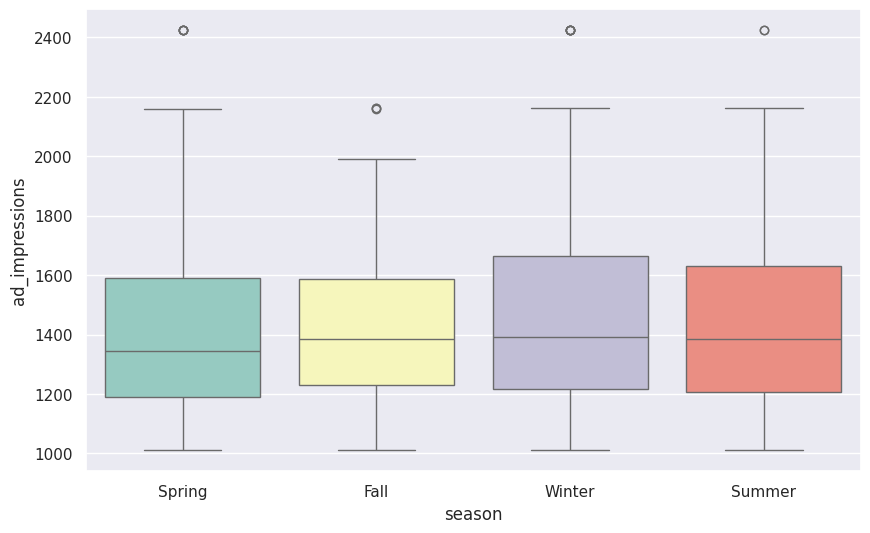

In [280]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x="season", y="ad_impressions", palette="Set3")

<Axes: xlabel='season', ylabel='ad_impressions'>

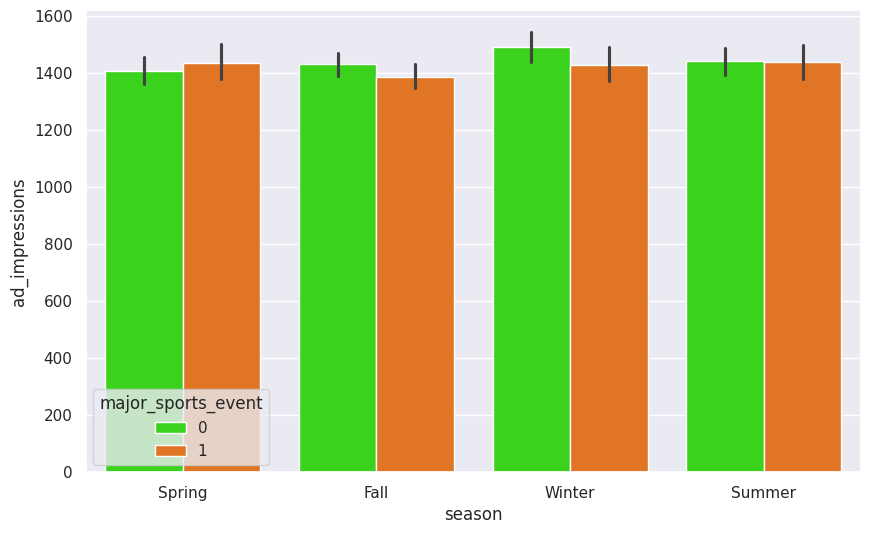

In [281]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x="season", y="ad_impressions", hue="major_sports_event", palette="gist_ncar")

<ipython-input-282-72d3193eddee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="dayofweek", y="views_trailer", palette="gist_ncar")


<Axes: xlabel='dayofweek', ylabel='views_trailer'>

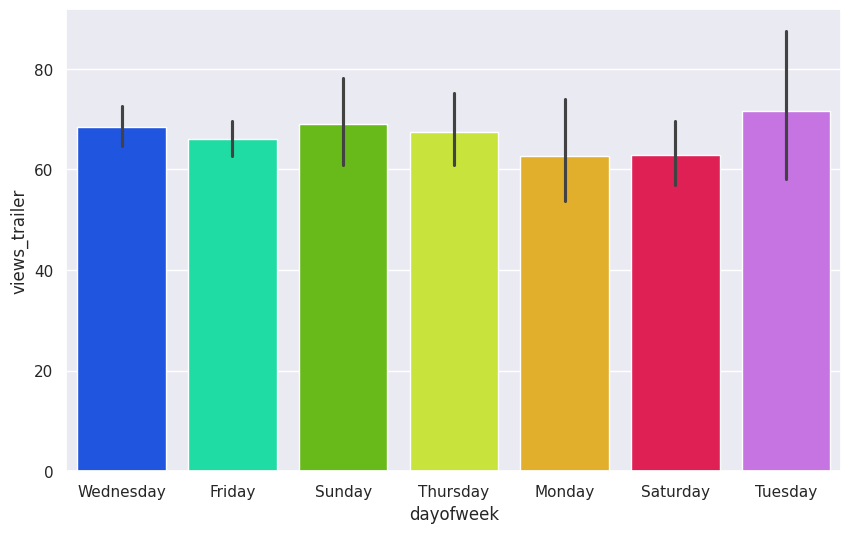

In [282]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x="dayofweek", y="views_trailer", palette="gist_ncar")

<Axes: xlabel='genre', ylabel='visitors'>

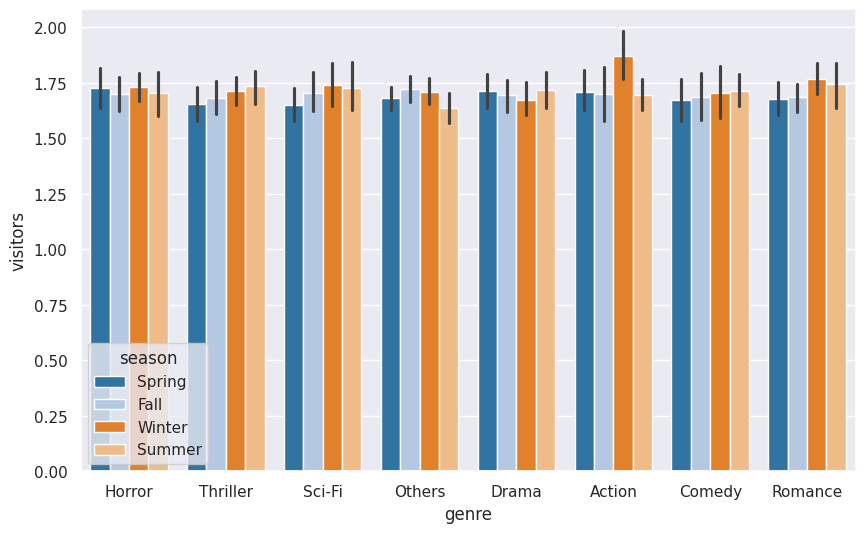

In [283]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x="genre", y="visitors", hue="season", palette="tab20")

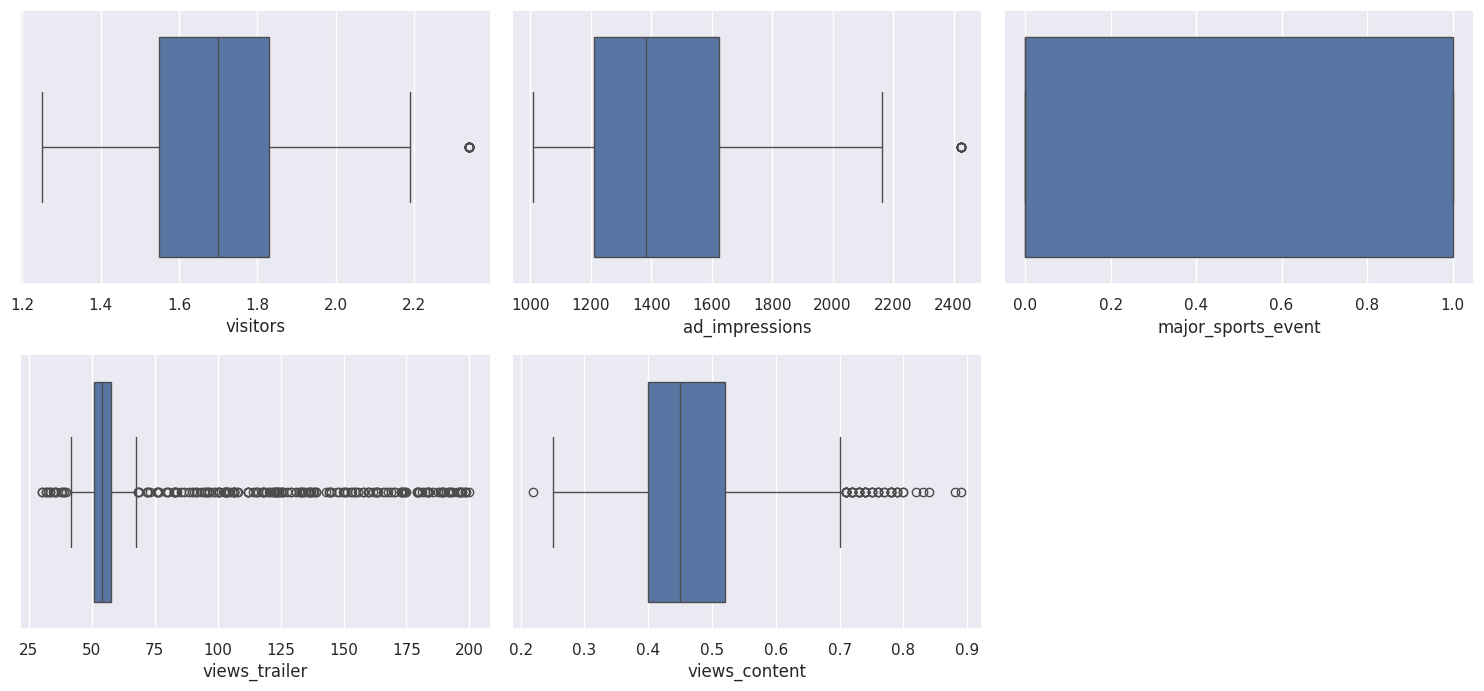

In [284]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,10))
for i, variable in enumerate(num_cols):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(data=data, x=variable)
  plt.tight_layout()

**1.Problem Definition and Questions to be Answered**


*  Determining the driver variables for first-day content viewership.

*   Analyzing the distribution of content views.

*   Analyzing the distribution of genres.
*   Examining how viewership varies with the day of release.

*   Examining how viewership varies with the season of release.















**2. Data Background and Contents**

The dataset contains the following columns:


*   visitors: Average number of visitors, in millions, to the platform in the past week.

*   ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed).

*   major_sports_event: Indicator of any major sports event on the day (0 or 1).
*  genre: Genre of the content.

*  dayofweek: Day of the release of the content.

*  season: Season of the release of the content.

*  views_trailer: Number of views, in millions, of the content trailer.

*   views_content: Number of first-day views, in millions, of the content.






















**3. Univariate Analysis**

**Q1.What does the distribution of content views look like?**

**Solution:**

We will visualize the distribution of views_content to understand how content performs on the first day. The analysis will show whether content viewership is evenly spread out or skewed toward certain values.

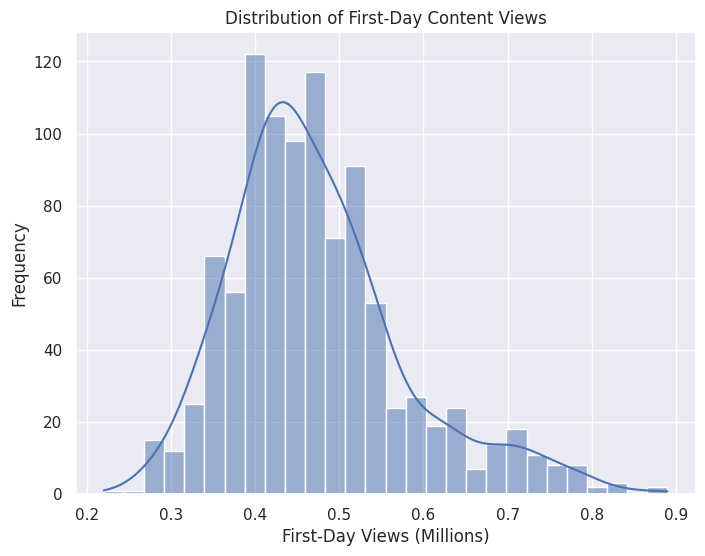

In [285]:
# EDA - Distribution of content views
plt.figure(figsize=(8,6))
sns.histplot(data['views_content'], kde=True)
plt.title('Distribution of First-Day Content Views')
plt.xlabel('First-Day Views (Millions)')
plt.ylabel('Frequency')
plt.show()

**Q2.What does the distribution of genre look like?**

**Solution:**

We will explore how many different types of content genres are there and if any particular genre dominates.


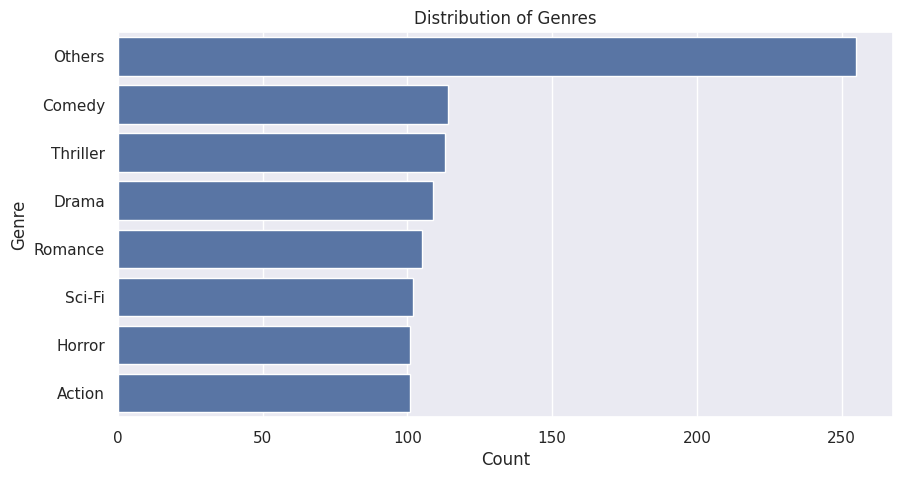

In [286]:
# EDA - Distribution of genres
plt.figure(figsize=(10,5))
sns.countplot(y=data['genre'], order=data['genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**4. Bivariate Analysis**

**Q3.The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?**

**Solution:**

The day of the week could influence viewership due to weekend/weekday viewing habits. We will create plots to show how views_content changes based on dayofweek.


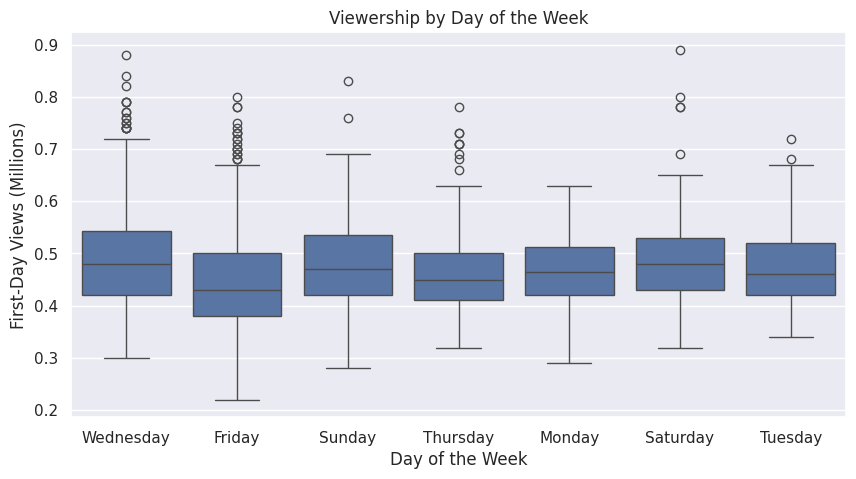

In [287]:
# EDA - Viewership vs Day of the Week
plt.figure(figsize=(10,5))
sns.boxplot(x='dayofweek', y='views_content', data=data)
plt.title('Viewership by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('First-Day Views (Millions)')
plt.show()


**Q4.How does the viewership vary with the season of release?**



**Solution:**

Seasonality might also affect viewing trends. We’ll visualize how viewership fluctuates based on the season of the release.

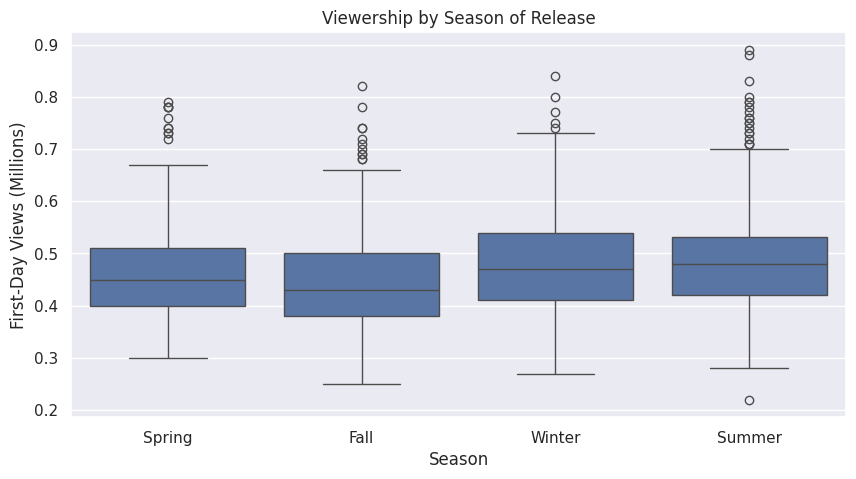

In [288]:
# EDA - Viewership vs Season of Release
plt.figure(figsize=(10,5))
sns.boxplot(x='season', y='views_content', data=data)
plt.title('Viewership by Season of Release')
plt.xlabel('Season')
plt.ylabel('First-Day Views (Millions)')
plt.show()

**Q5.What is the correlation between trailer views and content views?**

**Solution:**

Trailer performance could serve as an indicator for the actual performance of the content. We'll examine the relationship between views_trailer and views_content.

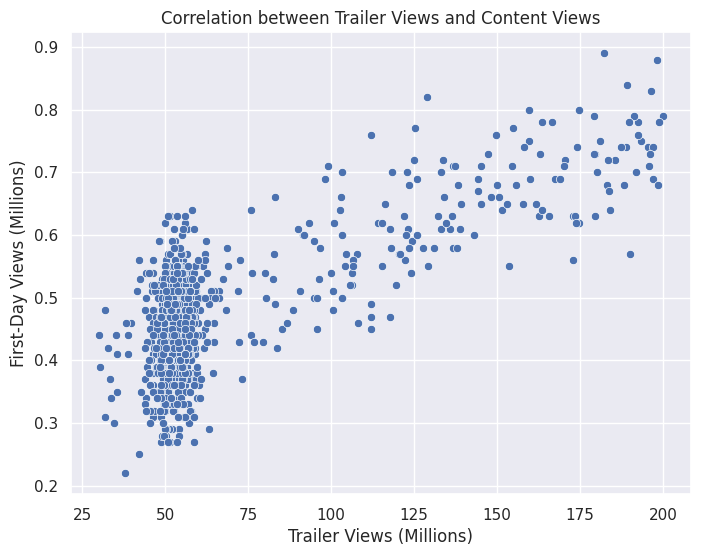

In [289]:
# EDA - Correlation between trailer views and content views
plt.figure(figsize=(8,6))
sns.scatterplot(x='views_trailer', y='views_content', data=data)
plt.title('Correlation between Trailer Views and Content Views')
plt.xlabel('Trailer Views (Millions)')
plt.ylabel('First-Day Views (Millions)')
plt.show()


In [290]:
# Calculating correlation
correlation = data['views_trailer'].corr(data['views_content'])
print(f'Correlation between trailer views and first-day content views: {correlation}')

Correlation between trailer views and first-day content views: 0.753962214820536


**5. Insights Based on EDA**



*   The distribution of content views shows a right-skewed pattern.

*   The genre distribution indicates the most and least popular genres.

*   The genre distribution indicates the most and least popular genres.
*    Viewership varies significantly with the day of release and season.

*   There is a positive correlation between trailer views and content views.














## Data Preprocessing

### Data overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [291]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


* The dataset contains information about different driving factors that analyze the content.


In [292]:
data['major_sports_event'] = data['major_sports_event'].astype('category')

### Checking the shape of the dataset

In [293]:
data.shape

(1000, 8)

* The dataset contains information (8 driving factors) about 1000 current content in the OTT platform.

### Checking the data types of the columns for the dataset

In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   visitors            1000 non-null   float64 
 1   ad_impressions      1000 non-null   float64 
 2   major_sports_event  1000 non-null   category
 3   genre               1000 non-null   object  
 4   dayofweek           1000 non-null   object  
 5   season              1000 non-null   object  
 6   views_trailer       1000 non-null   float64 
 7   views_content       1000 non-null   float64 
dtypes: category(1), float64(4), object(3)
memory usage: 55.9+ KB


* There are 4 numeric (*float* type) and 3 string (*object* type) columns in the data


### Statistical summary of the dataset

In [295]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,2.0,0.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89


**1.Checking for duplicate values**





In [296]:
data.duplicated().sum()

0

* There are no duplicate values in the data

**2.Checking for missing values**

In [297]:
data.isnull().sum()

,0
visitors,0
ad_impressions,0
major_sports_event,0
genre,0
dayofweek,0
season,0
views_trailer,0
views_content,0


* There are no missing values in any of the columns.

In [298]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

**3.Outlier Treatment**

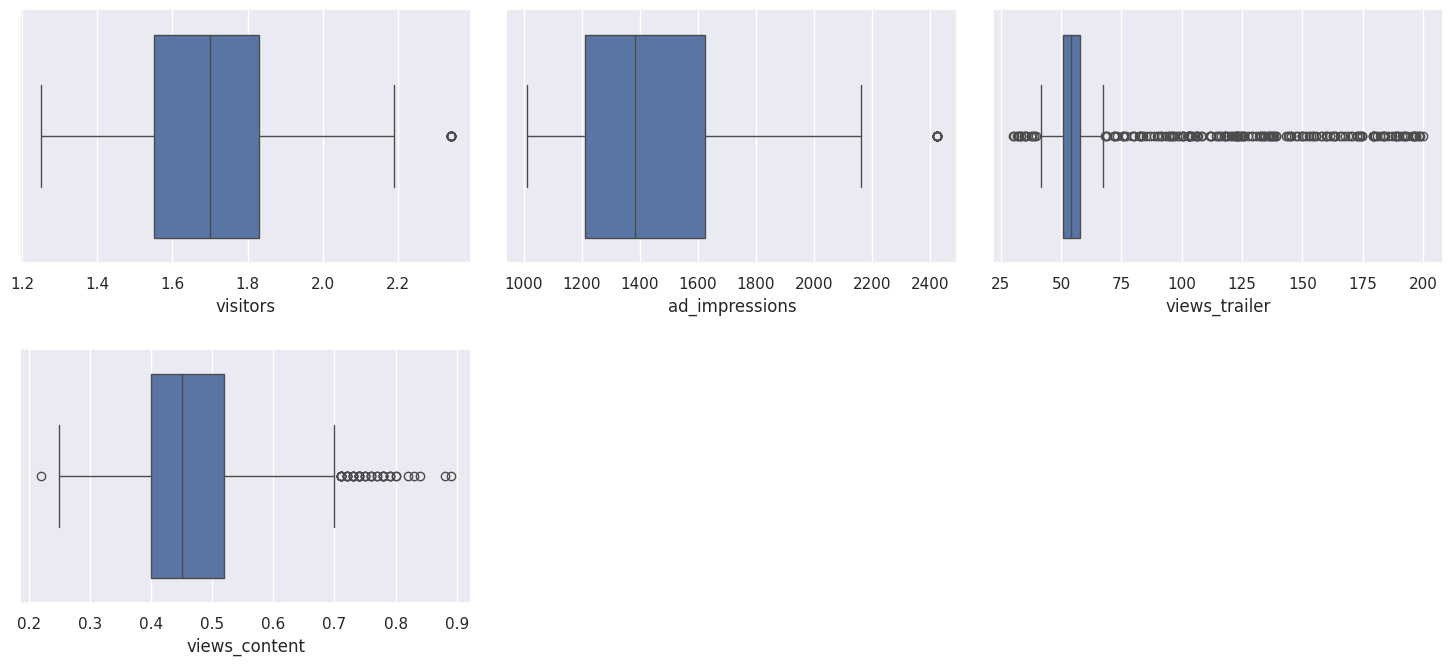

In [299]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.


**4.Feature Engineering and Data Preparation for Modelling**

* We will convert categorical variables like dayofweek, season, and genre into dummy/one-hot encoded variables.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.
- We will build a Linear Regression model using the train data and then check it's performance.






In [300]:
# Define the features and target variable
X = data.drop(["views_content"], axis=1)
y = data["views_content"]
print(X.head())
print(y.head())


   visitors  ad_impressions major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                  0    Horror  Wednesday  Spring   
1      1.46         1498.41                  1  Thriller     Friday    Fall   
2      1.47         1079.19                  1  Thriller  Wednesday    Fall   
3      1.85         1342.77                  1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                  0    Sci-Fi     Sunday  Winter   

   views_trailer  
0          56.70  
1          52.69  
2          48.74  
3          49.81  
4          55.83  
0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [301]:
# let's add the intercept to data
X = sm.add_constant(X)

In [302]:
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True,)
X.head()

,const,visitors,ad_impressions,views_trailer,major_sports_event_1,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,56.70,False,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.0,1.46,1498.41,52.69,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.0,1.47,1079.19,48.74,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.0,1.85,1342.77,49.81,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,1.46,1498.41,55.83,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [303]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,visitors,ad_impressions,views_trailer,major_sports_event_1,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,56.70,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.46,1498.41,52.69,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.47,1079.19,48.74,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.85,1342.77,49.81,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.46,1498.41,55.83,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0



*  After data preprocessing, we will train a linear regression model using views_content as the target variable.


In [304]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [305]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


- We will interpret the coefficients to determine the driving factors for content viewership (i.e., which factors have a significant positive or negative influence).


#Model building - Linear Regression

**Building the model and commenting on the model statistics and displaying column coefficients with column names**

In [306]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 15 Sep 2024   Prob (F-statistic):          1.32e-215
Time:                        15:17:08   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0602 

In [307]:
# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

# Model statistics
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                      Coefficient
const                    0.000000
visitors                 0.129451
ad_impressions           0.000004
views_trailer            0.002330
major_sports_event_1    -0.060326
genre_Comedy             0.009352
genre_Drama              0.012625
genre_Horror             0.009862
genre_Others             0.006325
genre_Romance            0.000551
genre_Sci-Fi             0.013143
genre_Thriller           0.008708
dayofweek_Monday         0.033662
dayofweek_Saturday       0.057887
dayofweek_Sunday         0.036321
dayofweek_Thursday       0.017289
dayofweek_Tuesday        0.022837
dayofweek_Wednesday      0.047376
season_Spring            0.022602
season_Summer            0.044203
season_Winter            0.027161


#Interpreting the Regression Results

Adjusted R-squared: It reflects the fit of the model.

Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.

In our case, the value for adj. R-squared is 0.780, which is good.

const coefficient: It is the Y-intercept.
It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.
In our case, the value for const coefficient is 0.0568





In [308]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [309]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04853,0.038197,0.791616,0.785162,8.55644


In [310]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050603,0.040782,0.766447,0.748804,9.030464


**Observations:**

The training R2
 is 0.78, so the model is not underfitting

The train and test RMSE and MAE are comparable, so the model is not overfitting either

MAE suggests that the model can predict anime ratings within a mean error of 0.34 on the test data

MAPE of 8.5 on the test data means that we are able to predict within 12.6% of the anime ratings

#Testing the assumptions of linear regression model

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

**1.Test for multicollinearity**
* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

    

Let's define a function to check VIF.

In [311]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
 # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i)
         for i in range(len(predictors.columns))]
    return vif

In [312]:
checking_vif(X_train)

,feature,VIF
0,const,99.679317
1,visitors,1.027837
2,ad_impressions,1.029390
3,views_trailer,1.023551
4,major_sports_event_1,1.065689
5,genre_Comedy,1.917635
6,genre_Drama,1.926699
7,genre_Horror,1.904460
8,genre_Others,2.573779
9,genre_Romance,1.753525


* No multicollinearity is present among the variables as all VIF values are below 5.
* We will ignore the VIF values for dummy variables and the constant (intercept).

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [313]:
# initial list of columns
predictors = X_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'views_trailer', 'major_sports_event_1', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [314]:
x_train1 = X_train[selected_features]
x_test1 = X_test[selected_features]

In [315]:
olsmod2 = sm.OLS(y_train, x_train1).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 15 Sep 2024   Prob (F-statistic):          7.03e-224
Time:                        15:17:09   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0747 

In [316]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train1, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [317]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test1, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


**2. Test for Linearity of variables and independence of errors**


**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- We will make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [318]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()
df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals
df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.445434,-0.045434
716,0.70,0.677403,0.022597
640,0.42,0.433999,-0.013999
804,0.55,0.562030,-0.012030
737,0.59,0.547786,0.042214


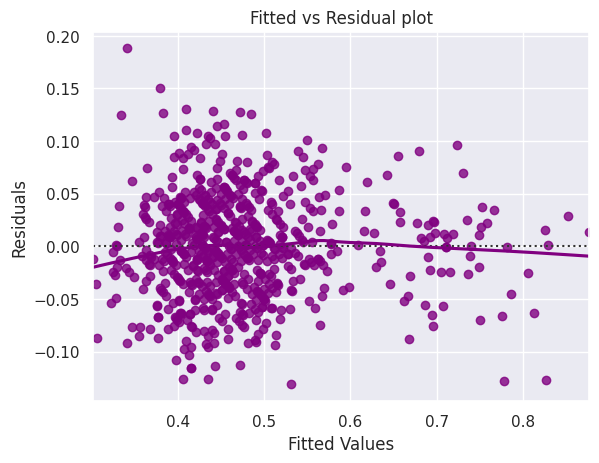

In [319]:
# let's plot the fitted values vs residuals
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

**2.Test for Normality of Residuals**

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.

    - **Null hypothesis:** Residuals are normally distributed
    - **Alternate hypothesis:** Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

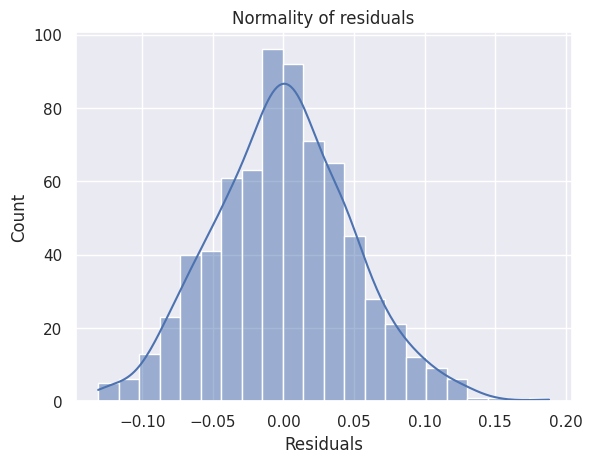

In [320]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

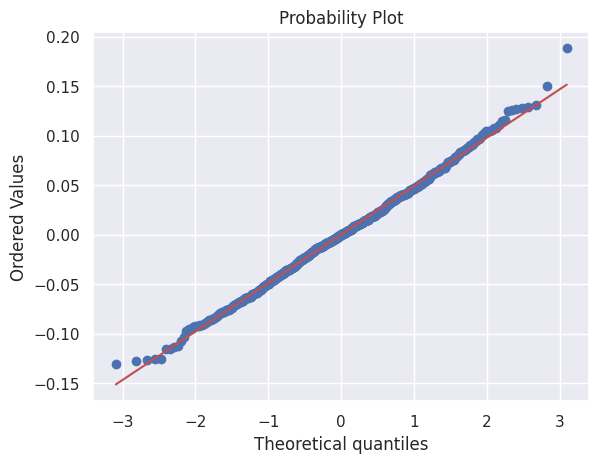

In [321]:
import pylab
import scipy.stats as stats
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()


- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [322]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.997315542716925, pvalue=0.31085896470099983)

- Since p-value > 0.05, the residuals are normal as per the Shapiro-Wilk test.

- **So, the assumption is satisfied.**

**3.Test for Homoscedasticity**

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - **Null hypothesis**: Residuals are homoscedastic
    - **Alternate hypothesis:** Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [323]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train1)
lzip(name, test)

[('F statistic', 1.1313612904200752), ('p-value', 0.12853551819087372)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

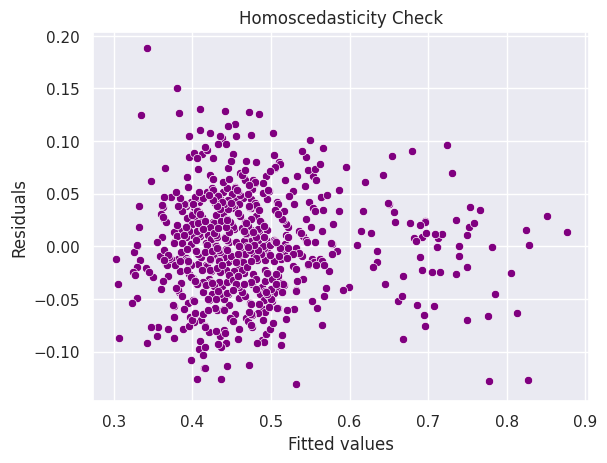

In [324]:
sns.scatterplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple")
plt.title('Homoscedasticity Check')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [325]:
# predictions on the test set
pred = olsmod2.predict(x_test1)
df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
983,0.43,0.434802
194,0.51,0.500314
314,0.48,0.430257
429,0.41,0.492544
267,0.41,0.487034
746,0.68,0.680000
186,0.62,0.595078
964,0.48,0.503909
676,0.42,0.490313
320,0.58,0.560155


## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [326]:
x_train_final = x_train1.copy()
x_test_final = x_test1.copy()

In [327]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 15 Sep 2024   Prob (F-statistic):          7.03e-224
Time:                        15:17:13   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0747 

In [328]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train_final, y_train)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [329]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test_final, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


* The model is able to explain ~79% of the variation in the data.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 9.2% on the first-day viewership.

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

##Actionable Insights & Recommendations

**Significance of Predictors:** The coefficients indicate the impact of each predictor on the first-day viewership.

**Key Takeaways for the Business:**


*  Increase marketing spend to boost ad impressions.
*  Optimize release days and seasons based on viewership patterns.  
*  Promote trailers effectively to increase first-day views.








